In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
trials = np.random.negative_binomial(3, 0.1, size=100)

In [56]:
successes = np.random.binomial(trials, 0.5 + np.random.uniform(-0.2,0.1, size=100))

In [57]:
successes

array([ 7, 16, 31, 13,  4,  6,  9,  5,  6,  4, 12,  2,  7,  4, 19, 14, 10,
       11,  0, 26,  8, 10,  9,  7,  0, 14,  7,  6,  0,  8, 18, 17, 28, 16,
       14, 14, 17,  7,  6, 15,  9, 10,  6,  1,  7, 11, 16,  7, 13, 26,  9,
       10,  4,  3, 12, 14, 28,  9, 19,  4, 26, 11, 23, 35,  9, 10, 16, 15,
       17, 19,  5, 18, 11,  6,  5,  8,  7,  2, 11, 18,  3, 13, 11,  1,  3,
       16,  8,  4,  2, 26,  4, 13, 19, 19,  2,  4,  8, 12,  9, 14])

In [76]:
def magnitude(trials, successes):
    percentile_coef = 4
    failures = trials - successes
    a = successes + 1.
    b = failures + 1.
    mean_ = a / (a + b)
    variance_ = np.sqrt( a*b / (a+b)**2 / (a + b + 1))    
    return abs(0.5 - mean_ - percentile_coef * variance_) \
            + abs(0.5 - mean_ + percentile_coef * variance_)

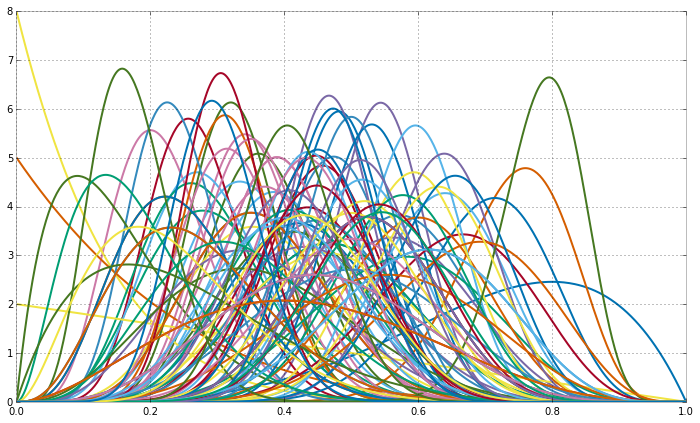

In [77]:
# plot first 
figsize(12,7)
plt.subplot()
from scipy.stats import beta

x = np.linspace(0,1, 500)
for t, s in zip(trials, successes):
    y = beta(s+1, t-s+1).pdf(x)
    plot(x,y)


In [80]:
min_ = np.inf
for t, s in zip(trials, successes):
    m = magnitude(t,s)
    if m < min_:
        print t, s, m
        min_ = m


15 7 0.941176470588
35 16 0.64674923418
57 31 0.514540093858
60 28 0.502902728225
59 18 0.470506635821


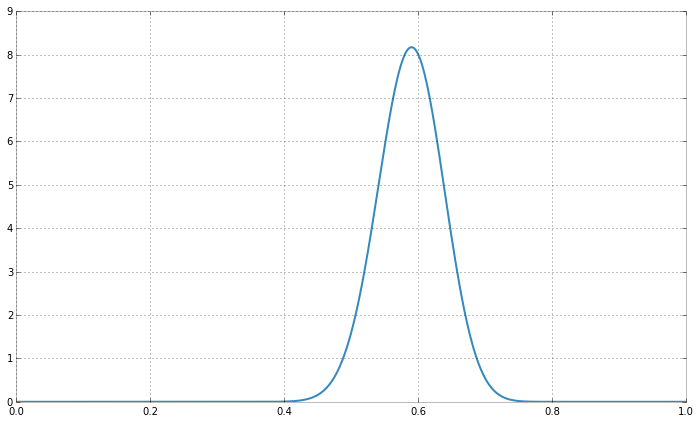

In [81]:
y = beta(59+1, 59-18+1).pdf(x)
plot(x,y)


In [68]:
magnitude(8, 6)

0.138169855942


0.45596052460711989